<a href="https://colab.research.google.com/github/Chinhan1532/AI_Class/blob/main/AI_W11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


so hinh la: 7


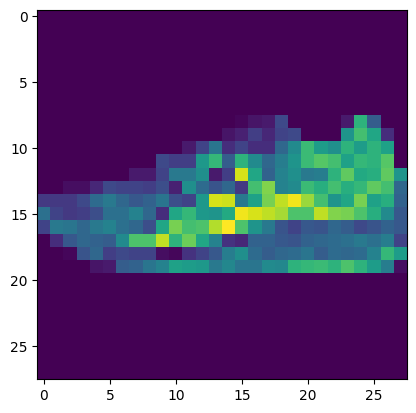

In [4]:
digit=x_train[30153]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('so hinh la:',y_train[30153])

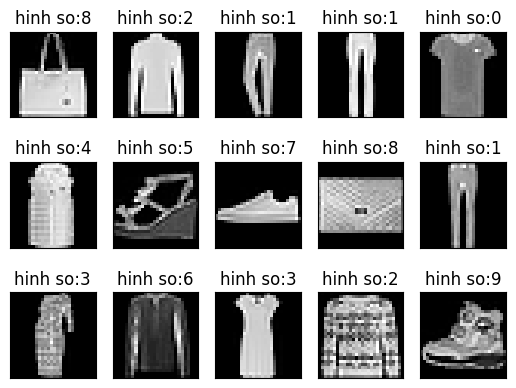

In [5]:
for i in range(15):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+1532],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+1532]))
   plt.xticks([])
   plt.yticks([])

In [6]:
x_train= x_train.reshape(60000,28,28,1)
x_test= x_test.reshape(10000,28,28,1)
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255
from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train,10)  #từ 1 bit thành 10 bit
y_test = to_categorical(y_test,10)


In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [8]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
batch_size=64
epochs=20
classes=10

In [9]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same')) # 32: số lần tích chập, kernel_size: kích thước tích chập
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


In [10]:
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [11]:
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
938/938 [==============================] - 16s 5ms/step - loss: 0.4350 - accuracy: 0.8412
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2745 - accuracy: 0.8985
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2305 - accuracy: 0.9155
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2003 - accuracy: 0.9257
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1727 - accuracy: 0.9352
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1539 - accuracy: 0.9424
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1314 - accuracy: 0.9509
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1118 - accuracy: 0.9580
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0940 - accuracy: 0.9640
Epoch 10/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0817 - accuracy: 0.969

In [12]:
model.save('model1.h5')


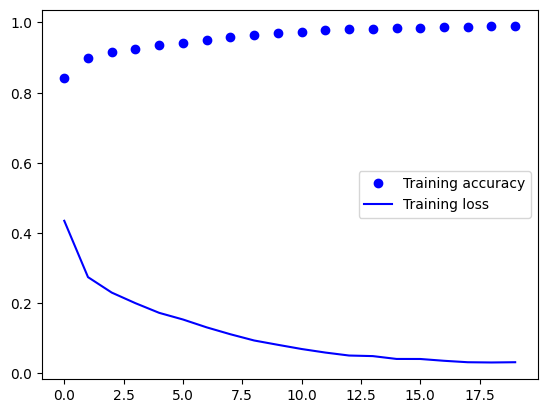

In [17]:
accuracy= train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.legend()
plt.show()